# Small Group: Rolling Means

## Task: Make a line plot of the polar vortex temperatures and add a rolling mean line to the plot.

### Some guidance:

1. Read in the `polarvortex.csv` file.
2. Filter out the `pr103j2` sensor from the data.
3. Convert `timestamp` to datetime and make it the index.
4. Convert `value_hrf` to float using the `.astype()` function.
5. Plot! Make it look good: Use proper axes, labels, legend, etc.
6. Include a rolling mean, sampling hourly with `'H'`.

### Steal from Joe: you can copy and paste from his notebook.

<img src = '../images/rolling_mean.gif' width = 400>

We will use the pyplot module which provides full control of line styles, font and other properties. The style package gives support for easy-to-switch plotting “styles”.  We will use a style called "seaborn", but others are available.

In [1]:
import pandas as pd
# pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
plt.style.use('seaborn') 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
sensor = pd.read_csv("../data/polarvortex.csv")

In [3]:
sensor.head()

,Unnamed: 0,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,4097665,2019-01-30 00:00:24,001e06113cf1,lightsense,apds_9006_020,intensity,65535,5267.409
1,4097666,2019-01-30 00:00:24,001e06113cf1,lightsense,hih6130,humidity,65535,100.0
2,4097667,2019-01-30 00:00:24,001e06113cf1,lightsense,hih6130,temperature,65535,125.01
3,4097668,2019-01-30 00:00:24,001e06113cf1,lightsense,hmc5883l,magnetic_field_x,-1,-0.909
4,4097669,2019-01-30 00:00:24,001e06113cf1,lightsense,hmc5883l,magnetic_field_y,-1,-0.909


In [4]:
temps = sensor[sensor['sensor'] == 'pr103j2']
temps

,Unnamed: 0,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
20,4097685,2019-01-30 00:00:24,001e06113cf1,metsense,pr103j2,temperature,396,-15.4
45,4097710,2019-01-30 00:00:49,001e06113cf1,metsense,pr103j2,temperature,399,-15.15
70,4097735,2019-01-30 00:01:15,001e06113cf1,metsense,pr103j2,temperature,393,-15.6
95,4097760,2019-01-30 00:01:40,001e06113cf1,metsense,pr103j2,temperature,394,-15.5
120,4097785,2019-01-30 00:02:06,001e06113cf1,metsense,pr103j2,temperature,393,-15.6
...,...,...,...,...,...,...,...,...
168920,4266585,2019-01-31 23:58:15,001e06113cf1,metsense,pr103j2,temperature,382,-16.4
168945,4266610,2019-01-31 23:58:40,001e06113cf1,metsense,pr103j2,temperature,380,-16.55
168970,4266635,2019-01-31 23:59:06,001e06113cf1,metsense,pr103j2,temperature,378,-16.7
168995,4266660,2019-01-31 23:59:31,001e06113cf1,metsense,pr103j2,temperature,378,-16.7


In [5]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6761 entries, 20 to 169020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6761 non-null   int64 
 1   timestamp   6761 non-null   object
 2   node_id     6761 non-null   object
 3   subsystem   6761 non-null   object
 4   sensor      6761 non-null   object
 5   parameter   6761 non-null   object
 6   value_raw   6761 non-null   object
 7   value_hrf   6761 non-null   object
dtypes: int64(1), object(7)
memory usage: 475.4+ KB


In [6]:
temps.index = pd.to_datetime(temps['timestamp'])

In [7]:
temps.head()

,Unnamed: 0,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
timestamp,,,,,,,,
2019-01-30 00:00:24,4097685,2019-01-30 00:00:24,001e06113cf1,metsense,pr103j2,temperature,396,-15.4
2019-01-30 00:00:49,4097710,2019-01-30 00:00:49,001e06113cf1,metsense,pr103j2,temperature,399,-15.15
2019-01-30 00:01:15,4097735,2019-01-30 00:01:15,001e06113cf1,metsense,pr103j2,temperature,393,-15.6
2019-01-30 00:01:40,4097760,2019-01-30 00:01:40,001e06113cf1,metsense,pr103j2,temperature,394,-15.5
2019-01-30 00:02:06,4097785,2019-01-30 00:02:06,001e06113cf1,metsense,pr103j2,temperature,393,-15.6


In [8]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6761 entries, 2019-01-30 00:00:24 to 2019-01-31 23:59:57
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6761 non-null   int64 
 1   timestamp   6761 non-null   object
 2   node_id     6761 non-null   object
 3   subsystem   6761 non-null   object
 4   sensor      6761 non-null   object
 5   parameter   6761 non-null   object
 6   value_raw   6761 non-null   object
 7   value_hrf   6761 non-null   object
dtypes: int64(1), object(7)
memory usage: 475.4+ KB


In [9]:
temps['value_hrf'] = temps['value_hrf'].astype(float)

/var/folders/g5/snd53fks40x3654d894tk0tm0000gr/T/ipykernel_19570/122724463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps['value_hrf'] = temps['value_hrf'].astype(float)


In [10]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6761 entries, 2019-01-30 00:00:24 to 2019-01-31 23:59:57
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6761 non-null   int64  
 1   timestamp   6761 non-null   object 
 2   node_id     6761 non-null   object 
 3   subsystem   6761 non-null   object 
 4   sensor      6761 non-null   object 
 5   parameter   6761 non-null   object 
 6   value_raw   6761 non-null   object 
 7   value_hrf   6761 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 475.4+ KB


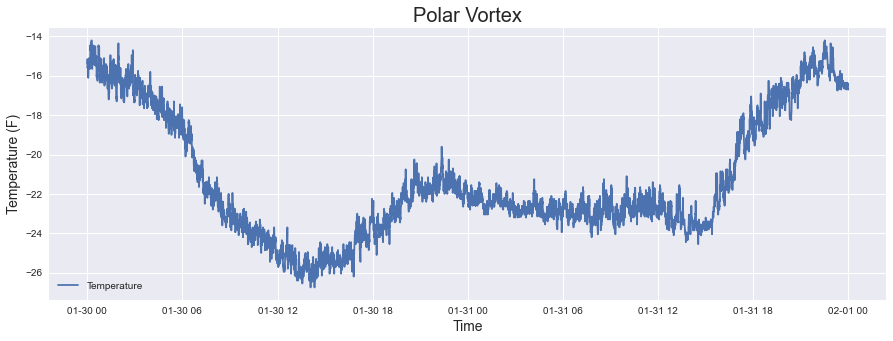

In [11]:
plt.plot(temps.index, temps['value_hrf'], label="Temperature")

plt.legend()

plt.title("Polar Vortex", fontsize=20)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

# Rolling Mean

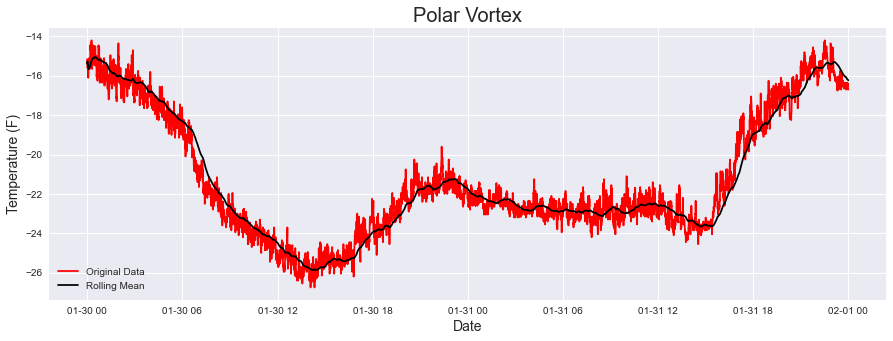

In [12]:
plt.plot(temps.index, temps['value_hrf'], label="Original Data", color='r')

plt.plot(temps.index, temps['value_hrf'].rolling('H').mean(), label="Rolling Mean", color='k')

plt.legend()

plt.title("Polar Vortex", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 